In [2]:
import pandas as pd
import vnstock as vs
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix


import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
import joblib

In [3]:
# crawling data
ticker = "TCB"
df = vs.stock_historical_data(symbol='TCB',start_date='2020-01-01', end_date='2023-01-01')
print(df)

        Open     High      Low    Close   Volume TradingDate
0    23550.0  23850.0  23500.0  23800.0  1387610  2020-01-02
1    23900.0  23950.0  23650.0  23650.0   756700  2020-01-03
2    23400.0  23400.0  23050.0  23050.0  1162990  2020-01-06
3    23050.0  23200.0  23000.0  23200.0  1043300  2020-01-07
4    22800.0  23050.0  22600.0  22750.0  1710390  2020-01-08
..       ...      ...      ...      ...      ...         ...
746  27250.0  27400.0  25700.0  25700.0  7545177  2022-12-26
747  25600.0  26300.0  25400.0  26300.0  4427020  2022-12-27
748  26100.0  26450.0  25750.0  26150.0  3299598  2022-12-28
749  26100.0  26300.0  25750.0  25950.0  2935675  2022-12-29
750  25950.0  26100.0  25850.0  25850.0  2182511  2022-12-30

[751 rows x 6 columns]


In [10]:
y = np.where(df['Close'] > df['Close'].shift(-1), 1, 0)

# Chọn biến đầu vào
X = df[['Open', 'High', 'Low', 'Volume']]

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Thêm intercept vào ma trận X
X = sm.add_constant(X)

In [12]:
# Chia tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Sử dụng mô hình hồi quy logistic để dự đoán xác suất tăng giá cổ phiếu trên tập test
logit_model = sm.Logit(y_train, X_train).fit()
y_pred = logit_model.predict(X_test) > 0.5

# Chuyển đổi y_pred thành nhị phân với ngưỡng 0.5
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

Optimization terminated successfully.
         Current function value: 0.681045
         Iterations 4


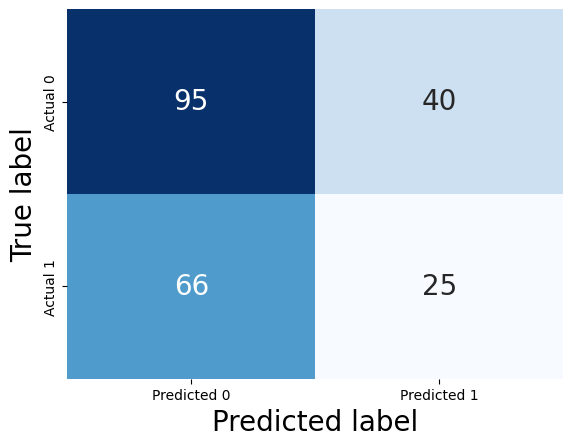

In [15]:
# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Vẽ biểu đồ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 20}, cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("True label", fontsize=20)
plt.show()

In [16]:
# Đánh giá mô hình trên tập kiểm tra
accuracy = metrics.accuracy_score(y_test, y_pred_binary)
precision = metrics.precision_score(y_test, y_pred_binary)
recall = metrics.recall_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.5309734513274337
Precision: 0.38461538461538464
Recall: 0.27472527472527475


In [ ]:
# xây dựng hàm loss function bằng phương pháp MLE
def loss_function(beta, X, y):
    # tính giá trị dự đoán
    z = np.dot(X, beta)
    y_hat = 1 / (1 + np.exp(-z))

    # tính log likelihood
    log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    # đảo dấu để tối đa hóa
    return -log_likelihood

In [ ]:
from scipy.optimize import minimize

# tìm giá trị beta tối ưu
beta_init = np.zeros(X_train.shape[1])
res = minimize(loss_function, beta_init, args=(X_train, y_train))

# in ra giá trị beta tối ưu
print('Beta: ', res.x)


C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:5: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


Beta:  [-4.57832467e-05 -9.33027512e-01 -9.61306999e-01 -9.07428104e-01
 -1.03423873e+03]


C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:5: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:5: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\truon\AppData\Local\Temp\ipykernel_11948\1132143509.py:8: RuntimeWarning: invalid value encountered in multiply
  log_likelihoo